IDEA: <br>
Session Analysis: Understanding traffic trends.<br>
User Engagement Analysis: Gauging the depth of user interaction.<br>
Channel Performance: Evaluating which channels are most effective.<br>
Website Traffic Forecasting: Predicting future traffic patterns.

In [2]:
import pandas as pd 
data = pd.read_csv('data\data-export.csv')

In [3]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
new_header = data.iloc[0] # grab the first row for the header
data = data[1:] # take the data less the header row

In [5]:
data.columns = new_header  # set the header row as the df header
data.reset_index(drop=True, inplace=True)

In [6]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [8]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


Now, let’s convert the date column into an appropriate datetime format and group it for further analysis:

In [9]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

In [10]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [11]:
data['Users'].dtypes

dtype('O')

In [12]:
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])


In [13]:
# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users':'sum', 'Sessions': 'sum'}) 

In [14]:
grouped_data

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102
...,...,...
2024-05-03 19:00:00,264,324
2024-05-03 20:00:00,273,327
2024-05-03 21:00:00,315,374


1. Session Analysis: Understanding traffic trends.<br>

In [15]:
import matplotlib.pyplot as plt

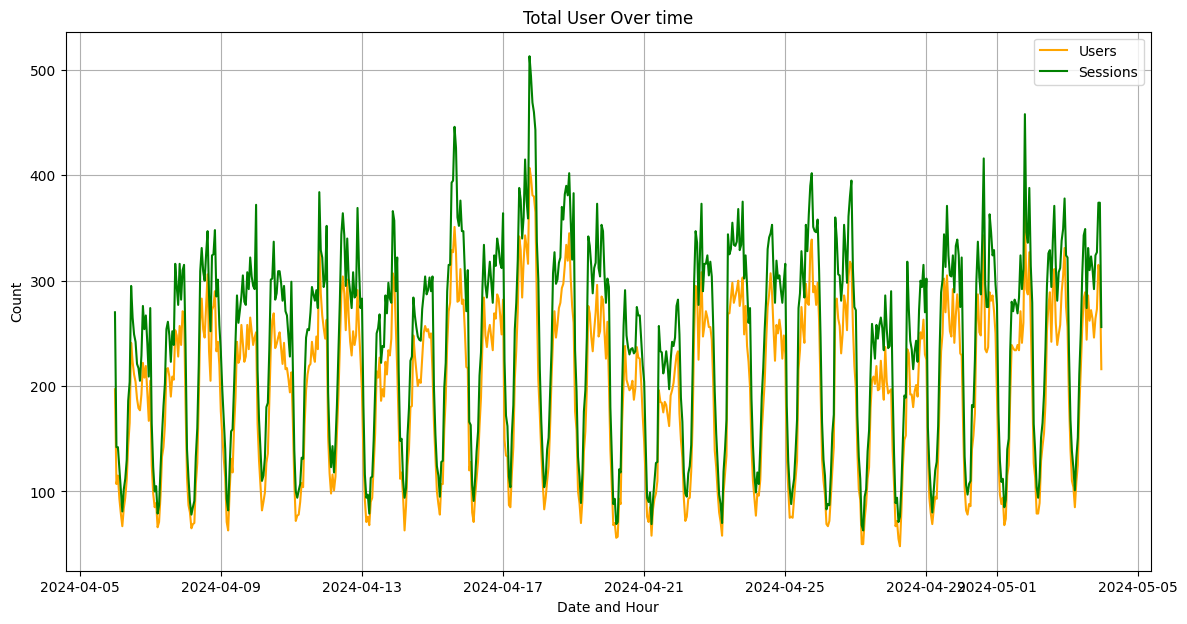

In [16]:
plt.figure(figsize=(14,7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='orange')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')

plt.title('Total User Over time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

2. User Engagement Analysis: Gauging the depth of user interaction.<br>


In [17]:
data['month'] = pd.DatetimeIndex(data['Date + hour (YYYYMMDDHH)']).month
data['year'] = pd.DatetimeIndex(data['Date + hour (YYYYMMDDHH)']).year

In [18]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,month,year
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402,4,2024
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147,4,2024
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069,4,2024
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044,4,2024
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001,4,2024


In [19]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])


In [20]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,month,year
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402,4,2024
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147,4,2024
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069,4,2024
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044,4,2024
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001,4,2024


From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

Now that we’ve analyzed the session trends, let’s move on to User Engagement Analysis. We will look into metrics like average engagement time per session, engagement rate, and events per session to evaluate how engaged users are when they visit the site:

In [21]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

In [22]:
# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

In [23]:
engagement_metrics

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964
...,...,...,...,...
2024-05-03 19:00:00,53.771757,0.568971,6.224420,0.498125
2024-05-03 20:00:00,87.194145,0.436159,6.370794,0.375790
2024-05-03 21:00:00,92.804300,0.546948,6.071114,0.471312


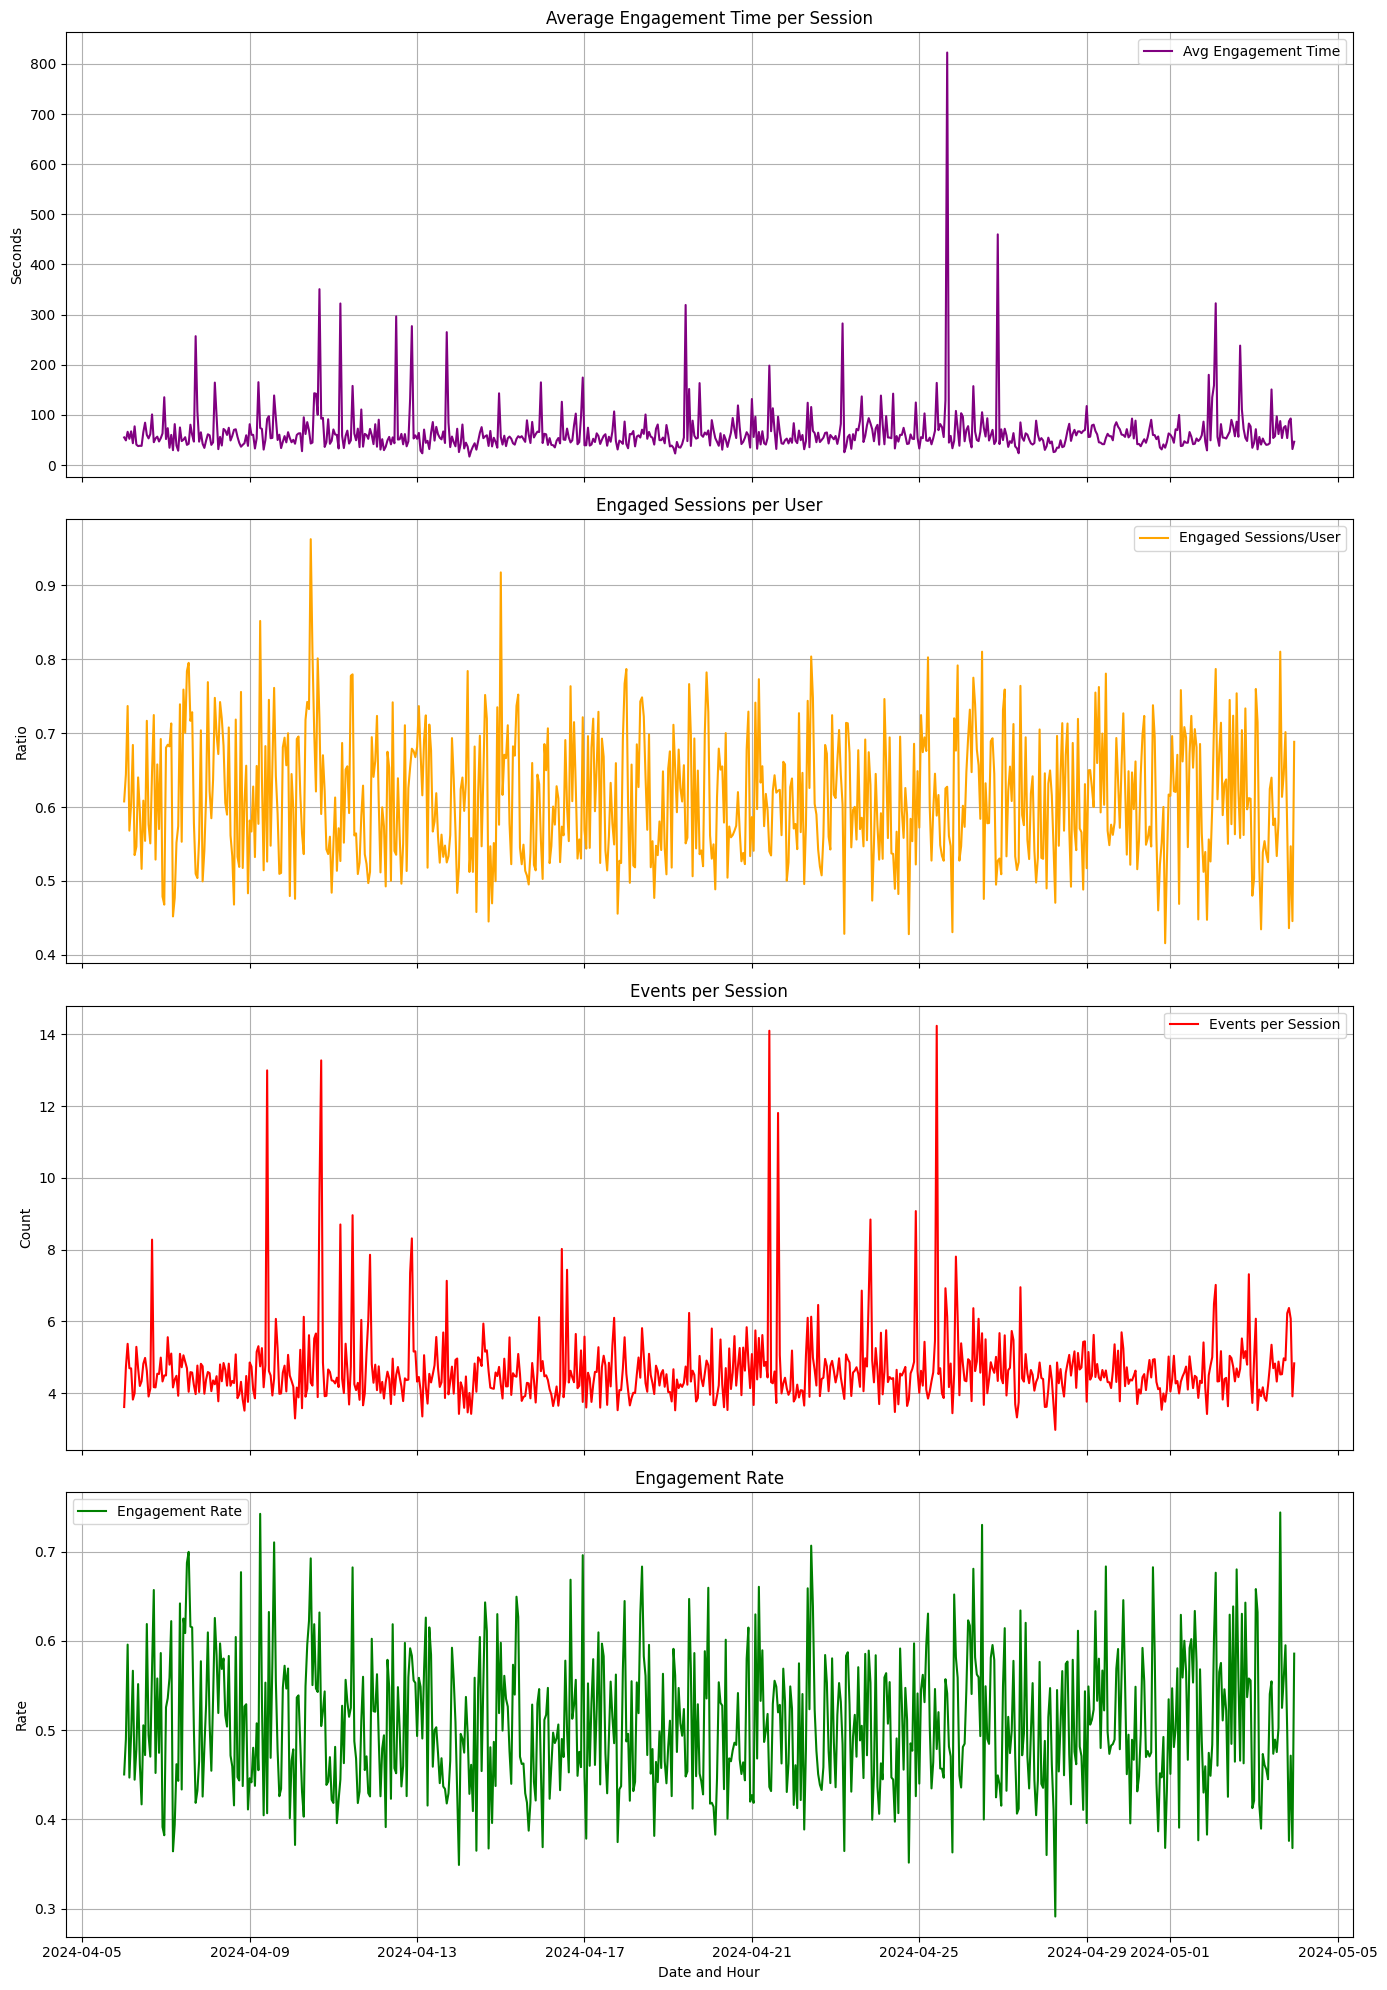

In [24]:
fig, ax = plt.subplots(4,1, figsize = (14,20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')


for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

Thời gian tương tác trung bình trên mỗi phiên: Thời gian dành cho mỗi phiên cho thấy sự biến động trong khoảng thời gian quan sát. Có những đỉnh điểm đáng chú ý, cho thấy thời điểm người dùng đặc biệt tương tác, có thể là do các sự kiện hoặc bản phát hành nội dung cụ thể.



Phiên tương tác trên mỗi người dùng: Tỷ lệ này dao động nhẹ nhưng nhìn chung cho thấy một phần lớn phiên trên mỗi người dùng tương tác. Các đỉnh trong số liệu này có thể tương ứng với thời điểm người dùng thấy nội dung có liên quan hoặc hấp dẫn hơn.

Sự kiện trên mỗi phiên: Số lượng sự kiện trên mỗi phiên vẫn tương đối ổn định nhưng có một số thay đổi. Các đỉnh ở đây có thể chỉ ra nhiều nội dung hoặc tính năng tương tác hơn đang được khách truy cập sử dụng.

Tỷ lệ tương tác theo thời gian cho biết có bao nhiêu phiên được coi là tương tác trong tổng số. Có một số thăng trầm có thể liên quan đến mức độ nội dung khác nhau được người dùng hưởng ứng như thế nào hoặc mức độ hiệu quả của một số kênh thu hút người dùng nhất định.

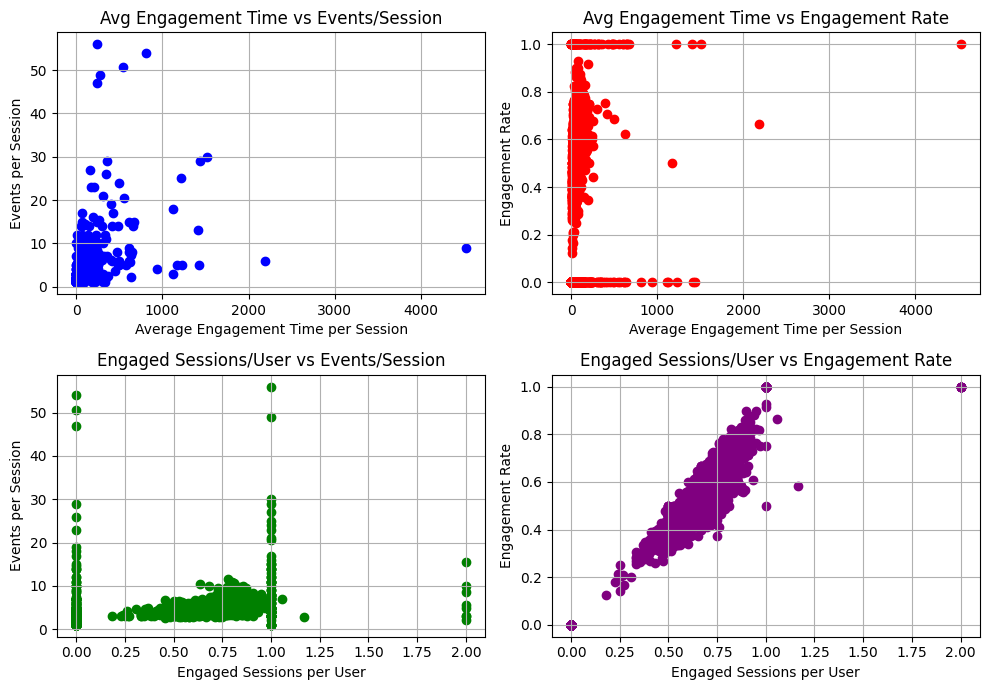

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.


Average Engagement Time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.

Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.

Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.

In [26]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

In [27]:
channel_performance

,Users,Sessions,Engaged sessions,Engagement rate,Events per session
Session primary channel group (Default channel group),,,,,
Direct,30042,37203,17243,0.455723,4.152344
Email,2,3,1,0.333333,3.333333
Organic Search,28387,33372,19425,0.578906,4.070839
Organic Social,47572,60627,32697,0.541180,4.905193
Organic Video,123,141,109,0.760000,7.524000
Referral,26774,30990,20653,0.660882,5.673981
Unassigned,540,559,4,0.007514,3.533470


In [28]:
# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()


3. Channel Performance: Evaluating which channels are most effective.<br>

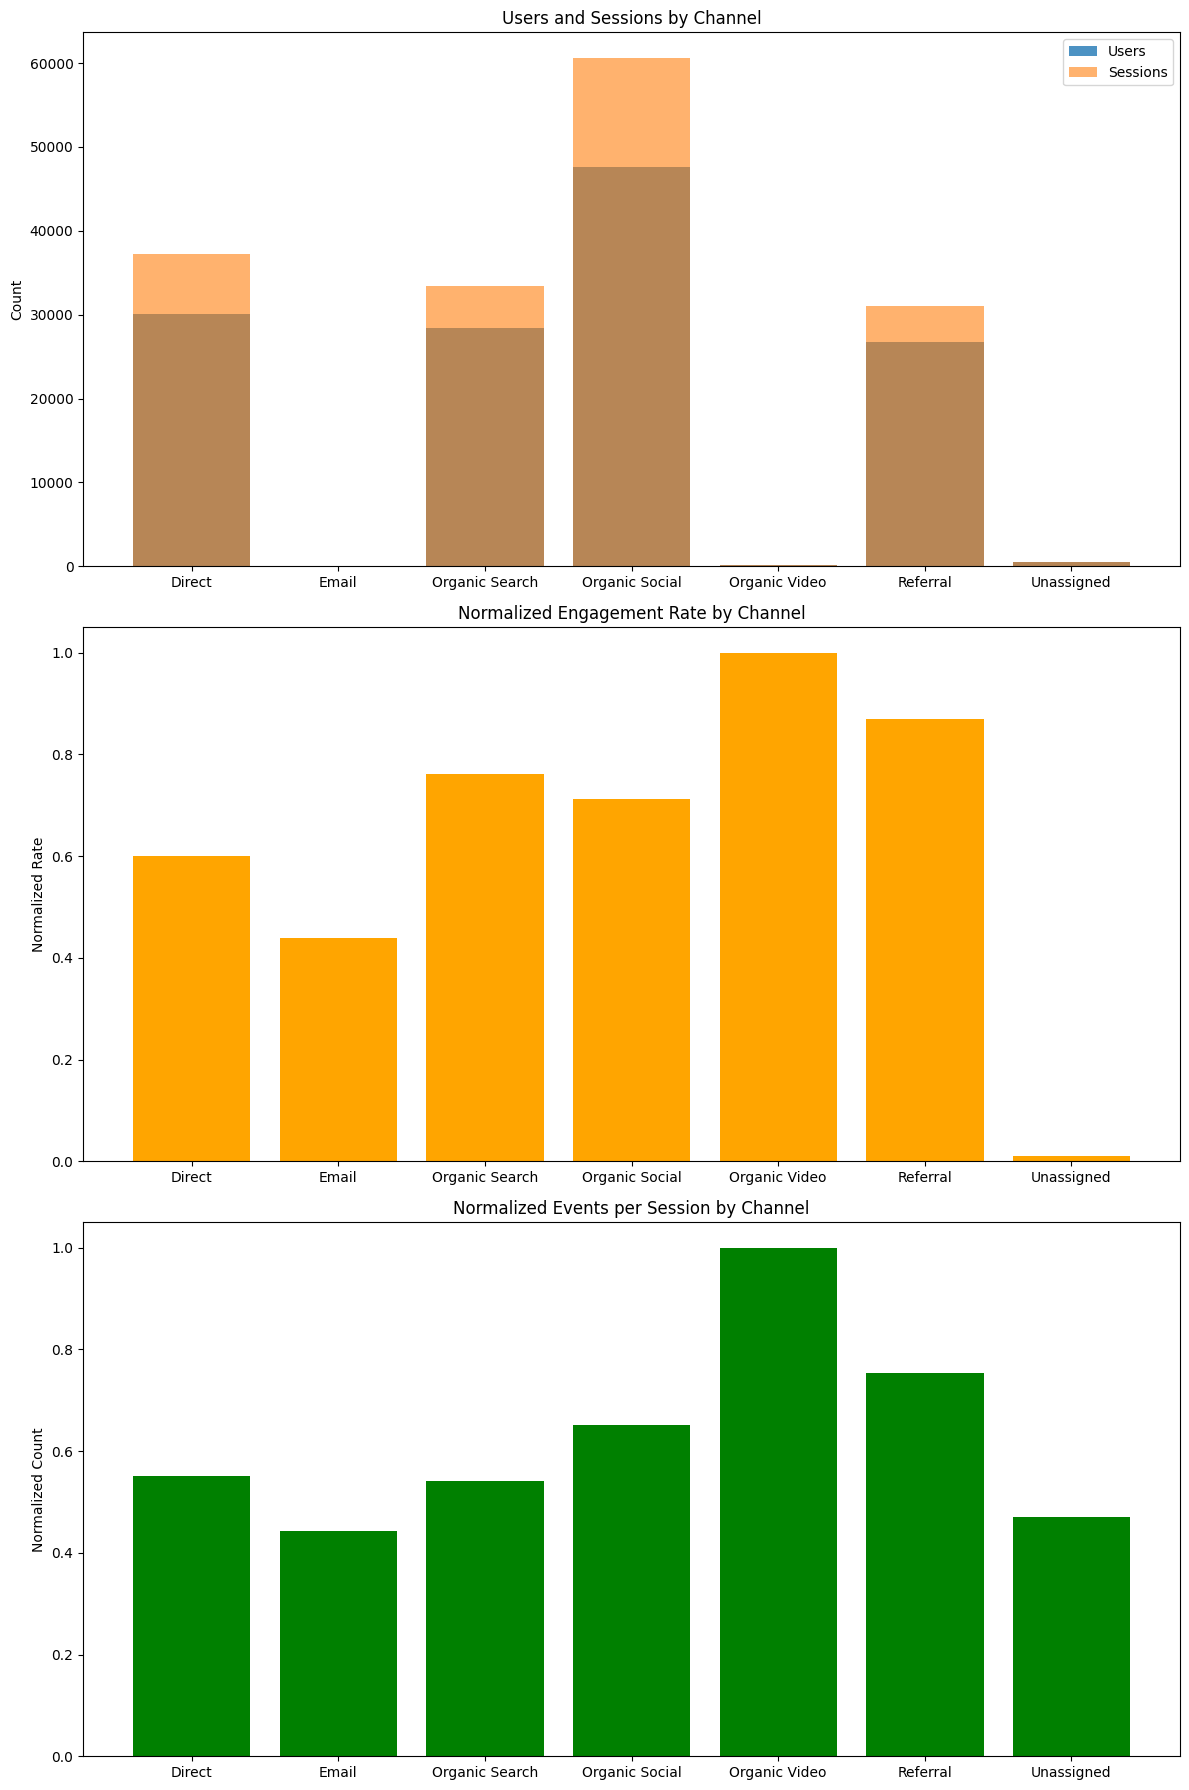

In [31]:

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()


# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

https://thecleverprogrammer.com/2023/10/18/arima-and-sarima-for-time-series-forecasting/

create a time series model

In [41]:
grouped_data

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102
...,...,...
2024-05-03 19:00:00,264,324
2024-05-03 20:00:00,273,327
2024-05-03 21:00:00,315,374


In [34]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')

In [44]:
time_series_data

Date + hour (YYYYMMDDHH)
2024-04-06 00:00:00    270
2024-04-06 01:00:00    142
2024-04-06 02:00:00    142
2024-04-06 03:00:00    122
2024-04-06 04:00:00    102
                      ... 
2024-05-03 19:00:00    324
2024-05-03 20:00:00    327
2024-05-03 21:00:00    374
2024-05-03 22:00:00    374
2024-05-03 23:00:00    256
Freq: H, Name: Sessions, Length: 672, dtype: int64

In [35]:
seasonal_period = 24

In [36]:
differenced_series = time_series_data.diff().dropna()

In [42]:
differenced_series

Date + hour (YYYYMMDDHH)
2024-04-06 01:00:00   -128.0
2024-04-06 02:00:00      0.0
2024-04-06 03:00:00    -20.0
2024-04-06 04:00:00    -20.0
2024-04-06 05:00:00    -21.0
                       ...  
2024-05-03 19:00:00     32.0
2024-05-03 20:00:00      3.0
2024-05-03 21:00:00     47.0
2024-05-03 22:00:00      0.0
2024-05-03 23:00:00   -118.0
Freq: H, Name: Sessions, Length: 671, dtype: float64

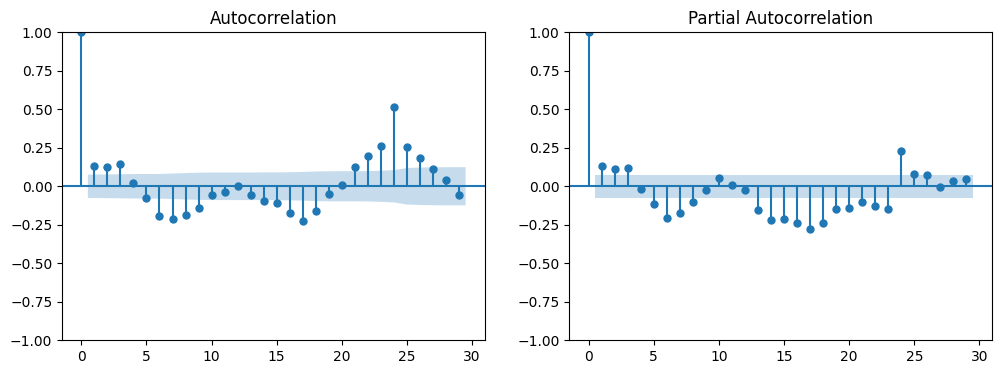

In [39]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
plot_acf(differenced_series, ax= axes[0])
plot_pacf(differenced_series, ax= axes[1])
plt.show()

PACF (Partial Autocorrelation Function): hàm tương quan 1 phần . Biểu đồ này giúp xác định tham số p cho phần AR của mô hình. ta thấy độ trễ mà sau đó hầu hết các tương quan tự động một phần không khác biệt đáng kể so với giá trị 0.PACF cho thấy một đột biến đáng kể ở độ trễ 1 rồi cắt đứt, cho thấy AR là một phần bậc 1. Do đó, p=1.

ACF (Autocorrelation Function):Hàm tự tương quan. MA của mô hình. Bạn tìm độ trễ mà sau đó hầu hết các tự tương quan không khác biệt đáng kể so với số không.

Tham số còn lại là d, biểu diễn tính theo mùa. Trong trường hợp của chúng ta, vì tính theo mùa tồn tại, chúng ta có thể chọn giá trị d là 1. Bây giờ, đây là cách chúng ta có thể dự báo lưu lượng truy cập của trang web trong 24 giờ tới bằng mô hình SARIMA:

4. Website Traffic Forecasting: Predicting future traffic patterns.

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [48]:
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24
sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))

In [50]:
sarima_model

In [51]:
sarima_model_fit = sarima_model.fit()


In [63]:
sarima_forecast = sarima_model_fit.forecast(steps=24)


In [64]:
sarima_forecast

2024-05-04 00:00:00    289.336182
2024-05-04 01:00:00    192.968170
2024-05-04 02:00:00    151.150658
2024-05-04 03:00:00    123.335909
2024-05-04 04:00:00    108.807217
2024-05-04 05:00:00    101.884937
2024-05-04 06:00:00    122.230128
2024-05-04 07:00:00    150.084588
2024-05-04 08:00:00    180.492350
2024-05-04 09:00:00    231.682440
2024-05-04 10:00:00    287.707882
2024-05-04 11:00:00    317.835168
2024-05-04 12:00:00    309.852104
2024-05-04 13:00:00    291.118884
2024-05-04 14:00:00    309.520273
2024-05-04 15:00:00    317.771501
2024-05-04 16:00:00    311.724495
2024-05-04 17:00:00    300.912640
2024-05-04 18:00:00    315.527775
2024-05-04 19:00:00    334.946533
2024-05-04 20:00:00    330.336931
2024-05-04 21:00:00    333.364683
2024-05-04 22:00:00    323.585625
2024-05-04 23:00:00    289.707810
Freq: H, Name: predicted_mean, dtype: float64

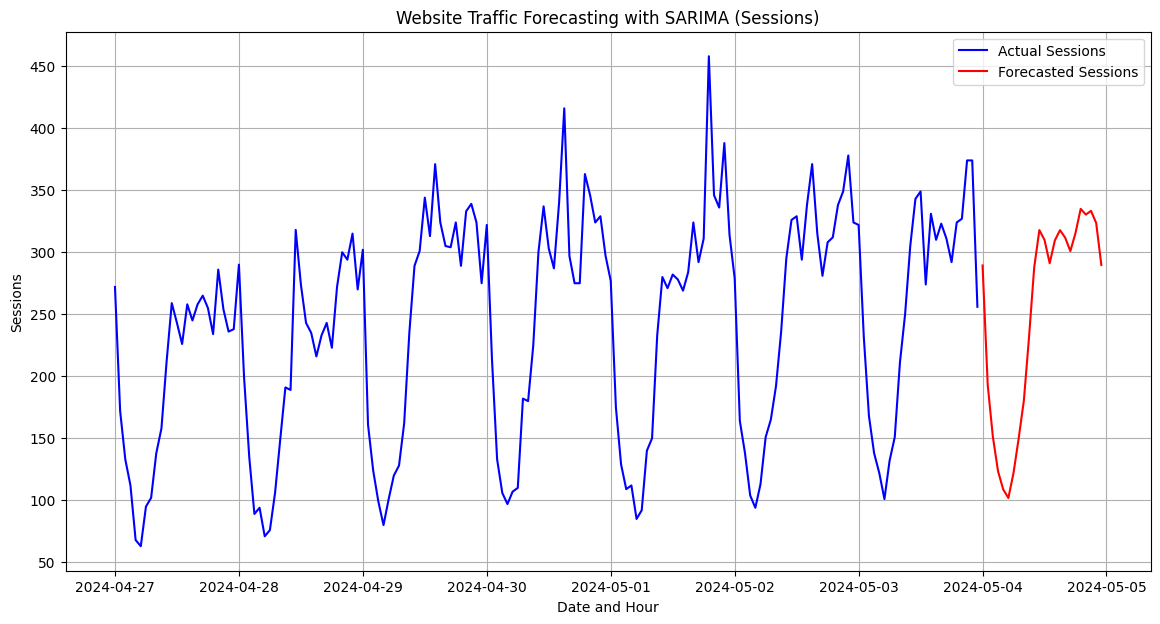

In [65]:
# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()